This is an EDA excercise to get some insights from a csv dataset scrapped from checki, an online automobile store. Expected outcomes are insights such as the location with the highest number of car listings, car brand listings by state, car Model with the highest number of listings, average price of cars per location and so on. To achieve all these we have to first clean our data and do some data engineering.


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing relevant libraries

Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Loading our dataset from our file path

In [9]:
file_path='/gdrive/My Drive/Ai_projects/checki EDA/Cheki_ng_scraping.csv'
cd= pd.read_csv(file_path)

Taking a look at our data

In [73]:
cd.head

<bound method NDFrame.head of       Unnamed: 0              Car_name  Year  ...        Status Ratings     Mileage
0              0          Toyota Camry  2015  ...  Foreign Used     4.5   86,628 km
1              1  Mercedes-Benz ML 350  2008  ...  Foreign Used     4.7  152,861 km
2              2        Toyota Corolla  2006  ...  Foreign Used     4.7  149,942 km
3              3          Lexus RX 300  2000  ...  Locally Used     3.6  246,456 km
4              4          Toyota Camry  2004  ...  Locally Used     3.6  236,871 km
...          ...                   ...   ...  ...           ...     ...         ...
5955        5955   Mercedes-Benz G 550  2015  ...  Foreign Used     4.8   32,085 km
5956        5956      Chevrolet Camaro  2019  ...  Foreign Used     5.0   14,941 km
5957        5957          Toyota Camry  2018  ...  Foreign Used     5.0  152,661 km
5958        5958          Toyota RAV 4  2004  ...  Foreign Used     5.0  104,261 km
5959        5959      Hyundai Santa Fe  2008  

let's have a look at the data type of each column and check ig there are any missing or null values

In [74]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5960 non-null   int64  
 1   Car_name    5960 non-null   object 
 2   Year        5960 non-null   int64  
 3   Price       5960 non-null   object 
 4   Location    5960 non-null   object 
 5   Status      5960 non-null   object 
 6   Ratings     5960 non-null   float64
 7   Mileage     5960 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 372.6+ KB


The price and mileage columns are of the object data type, we would have to change them to 'int' when neccesary. From the above we have no missing or null values.

Creating a new dataframe from our data set using only neccesary columns (dropping the unnamed column)

In [75]:
cols=['Car_name', 'Year', 'Price', 'Location', 'Status', 'Ratings',
       'Mileage']
cd_data = cd[cols]

In [76]:
cd_data.head(10)

,Car_name,Year,Price,Location,Status,Ratings,Mileage
0,Toyota Camry,2015,"₦ 5,475,000","Agidingbi, Lagos",Foreign Used,4.5,"86,628 km"
1,Mercedes-Benz ML 350,2008,"₦ 7,815,000","Ikeja, Lagos",Foreign Used,4.7,"152,861 km"
2,Toyota Corolla,2006,"₦ 2,815,000","Ipaja, Lagos",Foreign Used,4.7,"149,942 km"
3,Lexus RX 300,2000,"₦ 1,265,000","Iju, Lagos",Locally Used,3.6,"246,456 km"
4,Toyota Camry,2004,"₦ 1,465,000","Iju, Lagos",Locally Used,3.6,"236,871 km"
5,Mercedes-Benz CLS 400,2016,"₦ 25,015,000","Sangotedo, Lekki, Lagos",Foreign Used,4.7,"82,363 km"
6,Mercedes-Benz GLK 350,2015,"₦ 12,765,000","Berger Mkt, Lagos",Foreign Used,5.0,"77,293 mi"
7,Lexus RX 350,2013,"₦ 13,275,000","Berger Mkt, Lagos",Foreign Used,5.0,"68,201 mi"
8,Mercedes-Benz ML 550,2011,"₦ 8,215,000","Berger Mkt, Lagos",Foreign Used,4.8,"151,114 mi"
9,Lexus RX 350,2010,"₦ 7,946,000","Berger Mkt, Lagos",Foreign Used,4.9,"151,275 km"


# Data cleaning and feature engineering

# Mileage column
The mileage are in km and miles, we need to create a new column where all values for the mileages are converted to km

In [77]:
km=[]  #creating and empty set to hold the converted mileages
for i in cd_data.Mileage: # for each value in the mileage column
    if i[-2:]=='km':  # if the last two characters are 'km'
        km.append(i[:-3].replace(',','')) #add the mileage to the empty set 'km' without the units while stripping of comma's by replacing them with an empty character.
    if i[-2:]=='mi': # if the last two characters are 'mi'
        j=(i[:-3].replace(',',''))  #store the mileage with the 'j' variable without the units while stripping of comma's
        x=int(j)*1.6  #converting the unit from miles to km
        km.append(x) #add the mileage to the empty set 'km'

Creating a new column with the mileage all in km and having a look at the new data set

In [78]:
cd_data['Mileage_km']=km
cd_data

,Car_name,Year,Price,Location,Status,Ratings,Mileage,Mileage_km
0,Toyota Camry,2015,"₦ 5,475,000","Agidingbi, Lagos",Foreign Used,4.5,"86,628 km",86628
1,Mercedes-Benz ML 350,2008,"₦ 7,815,000","Ikeja, Lagos",Foreign Used,4.7,"152,861 km",152861
2,Toyota Corolla,2006,"₦ 2,815,000","Ipaja, Lagos",Foreign Used,4.7,"149,942 km",149942
3,Lexus RX 300,2000,"₦ 1,265,000","Iju, Lagos",Locally Used,3.6,"246,456 km",246456
4,Toyota Camry,2004,"₦ 1,465,000","Iju, Lagos",Locally Used,3.6,"236,871 km",236871
...,...,...,...,...,...,...,...,...
5955,Mercedes-Benz G 550,2015,"₦ 52,515,000","Agidingbi, Lagos",Foreign Used,4.8,"32,085 km",32085
5956,Chevrolet Camaro,2019,"₦ 27,515,000","Jakande, Lekki, Lagos",Foreign Used,5.0,"14,941 km",14941
5957,Toyota Camry,2018,"₦ 15,515,000","Abuja, Abuja",Foreign Used,5.0,"152,661 km",152661
5958,Toyota RAV 4,2004,"₦ 3,415,000","Berger Mkt, Lagos",Foreign Used,5.0,"104,261 km",104261


Now we can drop the mileage column.

In [79]:
cd_data.drop('Mileage', axis=1 ,inplace=True)

In [80]:
cd_data

,Car_name,Year,Price,Location,Status,Ratings,Mileage_km
0,Toyota Camry,2015,"₦ 5,475,000","Agidingbi, Lagos",Foreign Used,4.5,86628
1,Mercedes-Benz ML 350,2008,"₦ 7,815,000","Ikeja, Lagos",Foreign Used,4.7,152861
2,Toyota Corolla,2006,"₦ 2,815,000","Ipaja, Lagos",Foreign Used,4.7,149942
3,Lexus RX 300,2000,"₦ 1,265,000","Iju, Lagos",Locally Used,3.6,246456
4,Toyota Camry,2004,"₦ 1,465,000","Iju, Lagos",Locally Used,3.6,236871
...,...,...,...,...,...,...,...
5955,Mercedes-Benz G 550,2015,"₦ 52,515,000","Agidingbi, Lagos",Foreign Used,4.8,32085
5956,Chevrolet Camaro,2019,"₦ 27,515,000","Jakande, Lekki, Lagos",Foreign Used,5.0,14941
5957,Toyota Camry,2018,"₦ 15,515,000","Abuja, Abuja",Foreign Used,5.0,152661
5958,Toyota RAV 4,2004,"₦ 3,415,000","Berger Mkt, Lagos",Foreign Used,5.0,104261


# Price column
Now we need to remove the naira symbol and comma's from the values in our price column before finally changing their data type to int.

In [81]:
prices=[]
for i in cd_data.Price:
    a=i[2:].replace("," , "") #replacing comma's with an empty character (nothing).
    prices.append(int(a))

creating a new column for the prices and dropping the old price column we have

In [82]:
cd_data['Prices']=prices
cd_data.drop('Price',axis=1,inplace=True)
cd_data

,Car_name,Year,Location,Status,Ratings,Mileage_km,Prices
0,Toyota Camry,2015,"Agidingbi, Lagos",Foreign Used,4.5,86628,5475000
1,Mercedes-Benz ML 350,2008,"Ikeja, Lagos",Foreign Used,4.7,152861,7815000
2,Toyota Corolla,2006,"Ipaja, Lagos",Foreign Used,4.7,149942,2815000
3,Lexus RX 300,2000,"Iju, Lagos",Locally Used,3.6,246456,1265000
4,Toyota Camry,2004,"Iju, Lagos",Locally Used,3.6,236871,1465000
...,...,...,...,...,...,...,...
5955,Mercedes-Benz G 550,2015,"Agidingbi, Lagos",Foreign Used,4.8,32085,52515000
5956,Chevrolet Camaro,2019,"Jakande, Lekki, Lagos",Foreign Used,5.0,14941,27515000
5957,Toyota Camry,2018,"Abuja, Abuja",Foreign Used,5.0,152661,15515000
5958,Toyota RAV 4,2004,"Berger Mkt, Lagos",Foreign Used,5.0,104261,3415000


In [83]:
cd_data.columns

Index(['Car_name', 'Year', 'Location', 'Status', 'Ratings', 'Mileage_km',
       'Prices'],
      dtype='object')

# Creating a new column for the brand names
Let's get the brand names from the car names

In [84]:
brand=[]
for i in cd_data.Car_name:
    c = i.split(' ')[0] #splliting the car names at the space and taking the first value, which is the brand name
    brand.append(c)
  
cd_data['Brand']=brand
cd_data

,Car_name,Year,Location,Status,Ratings,Mileage_km,Prices,Brand
0,Toyota Camry,2015,"Agidingbi, Lagos",Foreign Used,4.5,86628,5475000,Toyota
1,Mercedes-Benz ML 350,2008,"Ikeja, Lagos",Foreign Used,4.7,152861,7815000,Mercedes-Benz
2,Toyota Corolla,2006,"Ipaja, Lagos",Foreign Used,4.7,149942,2815000,Toyota
3,Lexus RX 300,2000,"Iju, Lagos",Locally Used,3.6,246456,1265000,Lexus
4,Toyota Camry,2004,"Iju, Lagos",Locally Used,3.6,236871,1465000,Toyota
...,...,...,...,...,...,...,...,...
5955,Mercedes-Benz G 550,2015,"Agidingbi, Lagos",Foreign Used,4.8,32085,52515000,Mercedes-Benz
5956,Chevrolet Camaro,2019,"Jakande, Lekki, Lagos",Foreign Used,5.0,14941,27515000,Chevrolet
5957,Toyota Camry,2018,"Abuja, Abuja",Foreign Used,5.0,152661,15515000,Toyota
5958,Toyota RAV 4,2004,"Berger Mkt, Lagos",Foreign Used,5.0,104261,3415000,Toyota


# Extracting the car models from the car names 

In [85]:
model=[]
for i in cd_data.Car_name:
    c = i.split(' ')[1]
    model.append(c)

In [86]:
cd_data['Model']=model

In [87]:
cd_data

,Car_name,Year,Location,Status,Ratings,Mileage_km,Prices,Brand,Model
0,Toyota Camry,2015,"Agidingbi, Lagos",Foreign Used,4.5,86628,5475000,Toyota,Camry
1,Mercedes-Benz ML 350,2008,"Ikeja, Lagos",Foreign Used,4.7,152861,7815000,Mercedes-Benz,ML
2,Toyota Corolla,2006,"Ipaja, Lagos",Foreign Used,4.7,149942,2815000,Toyota,Corolla
3,Lexus RX 300,2000,"Iju, Lagos",Locally Used,3.6,246456,1265000,Lexus,RX
4,Toyota Camry,2004,"Iju, Lagos",Locally Used,3.6,236871,1465000,Toyota,Camry
...,...,...,...,...,...,...,...,...,...
5955,Mercedes-Benz G 550,2015,"Agidingbi, Lagos",Foreign Used,4.8,32085,52515000,Mercedes-Benz,G
5956,Chevrolet Camaro,2019,"Jakande, Lekki, Lagos",Foreign Used,5.0,14941,27515000,Chevrolet,Camaro
5957,Toyota Camry,2018,"Abuja, Abuja",Foreign Used,5.0,152661,15515000,Toyota,Camry
5958,Toyota RAV 4,2004,"Berger Mkt, Lagos",Foreign Used,5.0,104261,3415000,Toyota,RAV


# Creating a column for a cars model and year
Create a new column which contains the model and year of the car by combining data from the year and model column.

In [88]:
years=[]
for i in cd_data.Year:
    i=' '+str(i)
    years.append(str(i))
    
cd_data['Years']=years

cd_data['Model_year']=cd_data['Model']+cd_data['Years']
cd_data

,Car_name,Year,Location,Status,Ratings,Mileage_km,Prices,Brand,Model,Years,Model_year
0,Toyota Camry,2015,"Agidingbi, Lagos",Foreign Used,4.5,86628,5475000,Toyota,Camry,2015,Camry 2015
1,Mercedes-Benz ML 350,2008,"Ikeja, Lagos",Foreign Used,4.7,152861,7815000,Mercedes-Benz,ML,2008,ML 2008
2,Toyota Corolla,2006,"Ipaja, Lagos",Foreign Used,4.7,149942,2815000,Toyota,Corolla,2006,Corolla 2006
3,Lexus RX 300,2000,"Iju, Lagos",Locally Used,3.6,246456,1265000,Lexus,RX,2000,RX 2000
4,Toyota Camry,2004,"Iju, Lagos",Locally Used,3.6,236871,1465000,Toyota,Camry,2004,Camry 2004
...,...,...,...,...,...,...,...,...,...,...,...
5955,Mercedes-Benz G 550,2015,"Agidingbi, Lagos",Foreign Used,4.8,32085,52515000,Mercedes-Benz,G,2015,G 2015
5956,Chevrolet Camaro,2019,"Jakande, Lekki, Lagos",Foreign Used,5.0,14941,27515000,Chevrolet,Camaro,2019,Camaro 2019
5957,Toyota Camry,2018,"Abuja, Abuja",Foreign Used,5.0,152661,15515000,Toyota,Camry,2018,Camry 2018
5958,Toyota RAV 4,2004,"Berger Mkt, Lagos",Foreign Used,5.0,104261,3415000,Toyota,RAV,2004,RAV 2004


Let's have a look at how many unique locations we have

In [89]:
cd_data.Location.nunique()

110

# Extracting the states from the location column.

In [90]:
state=[]
for i in cd_data.Location:
    b=i.split(',')[-1]
    state.append(b)
cd_data['State']=state
cd_data

,Car_name,Year,Location,Status,Ratings,Mileage_km,Prices,Brand,Model,Years,Model_year,State
0,Toyota Camry,2015,"Agidingbi, Lagos",Foreign Used,4.5,86628,5475000,Toyota,Camry,2015,Camry 2015,Lagos
1,Mercedes-Benz ML 350,2008,"Ikeja, Lagos",Foreign Used,4.7,152861,7815000,Mercedes-Benz,ML,2008,ML 2008,Lagos
2,Toyota Corolla,2006,"Ipaja, Lagos",Foreign Used,4.7,149942,2815000,Toyota,Corolla,2006,Corolla 2006,Lagos
3,Lexus RX 300,2000,"Iju, Lagos",Locally Used,3.6,246456,1265000,Lexus,RX,2000,RX 2000,Lagos
4,Toyota Camry,2004,"Iju, Lagos",Locally Used,3.6,236871,1465000,Toyota,Camry,2004,Camry 2004,Lagos
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,Mercedes-Benz G 550,2015,"Agidingbi, Lagos",Foreign Used,4.8,32085,52515000,Mercedes-Benz,G,2015,G 2015,Lagos
5956,Chevrolet Camaro,2019,"Jakande, Lekki, Lagos",Foreign Used,5.0,14941,27515000,Chevrolet,Camaro,2019,Camaro 2019,Lagos
5957,Toyota Camry,2018,"Abuja, Abuja",Foreign Used,5.0,152661,15515000,Toyota,Camry,2018,Camry 2018,Abuja
5958,Toyota RAV 4,2004,"Berger Mkt, Lagos",Foreign Used,5.0,104261,3415000,Toyota,RAV,2004,RAV 2004,Lagos


# Checking for outliers 
checking the price column for outliers

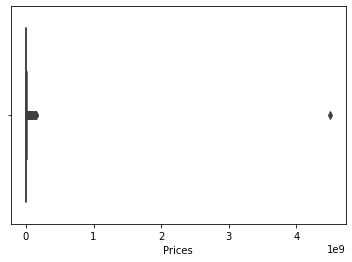

In [91]:
sns.boxplot(x=cd_data['Prices'])

From the graph above there's an outlier with an outlier in the price column. To find the outlier, we would sort the values in the price column 

In [94]:
cd_data.sort_values('Prices',axis=0,ascending=False)

,Car_name,Year,Location,Status,Ratings,Mileage_km,Prices,Brand,Model,Years,Model_year,State
627,Lexus RX 350,2007,"VGC, Lagos",Foreign Used,4.6,65438,4500014592,Lexus,RX,2007,RX 2007,Lagos
3664,Mercedes-Benz G 63 AMG,2019,"Victoria Island, Lagos",Foreign Used,5.0,4982,148015008,Mercedes-Benz,G,2019,G 2019,Lagos
3704,Land Rover Range Rover Autobiography,2019,"Victoria Island, Lagos",Foreign Used,4.9,7418,145015008,Land,Rover,2019,Rover 2019,Lagos
472,Land Rover Range Rover Autobiography,2019,"Kubuwa Expressway, Abuja",Foreign Used,5.0,18480,138015008,Land,Rover,2019,Rover 2019,Abuja
4008,Mercedes-Benz G 63 AMG,2019,"Lekki Pennisula, Lekki, Lagos",Foreign Used,5.0,9223,137715008,Mercedes-Benz,G,2019,G 2019,Lagos
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Honda Accord,2003,"Ikotun, Lagos",Locally Used,1.6,204058,615000,Honda,Accord,2003,Accord 2003,Lagos
406,Honda CR-V,1998,"Meiran, Lagos",Locally Used,4.7,203890,615000,Honda,CR-V,1998,CR-V 1998,Lagos
1339,Honda CR-V,1998,"Alimosho, Lagos",Locally Used,3.6,234176,585000,Honda,CR-V,1998,CR-V 1998,Lagos
1373,Toyota Camry,1996,"Rumukurushi, Port Harcourt",Locally Used,4.1,226447,565000,Toyota,Camry,1996,Camry 1996,Port Harcourt



Apart from the first car in the table above, all other cars seem to be reasonably priced, therefore we would drop the outlier using its index.

In [95]:
cd_data.drop(627, axis=0, inplace=True)

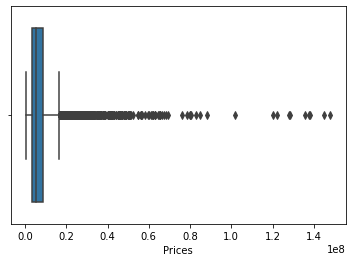

In [96]:
sns.boxplot(x=cd_data['Prices'])

# Data exploration
In this stage of our analysis, answers to the following questions are what we would be searching for:

Location with the highest number of cars

Car brand listings by state

Car brand with the highest number of listings

Average price of cars per location

Car listings by model year

car model with the highest rating

Most frequent rating of the cars

Most frequent status of the cars

Average price based on the status of the cars 

Status of models


# Location with the highest number of cars

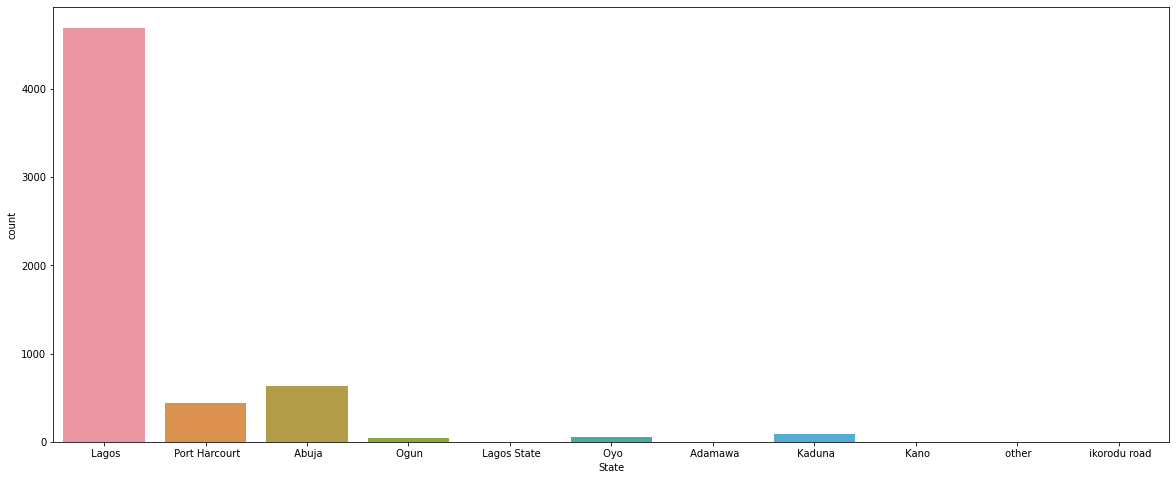

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(data=cd_data, x='State')

Lagos has the highest numer of cars.

# Car brand listings by state


In [99]:
pd.pivot_table(cd_data,index='State',columns='Brand', values = 'Location', aggfunc='count')

Brand,Acura,Audi,BMW,Bentley,Cadillac,Chevrolet,Chrysler,Citroën,DAF,Dodge,Ford,GAC,GMC,Honda,Hummer,Hyundai,Infiniti,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,Lincoln,MINI,Maserati,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Opel,Peugeot,Pontiac,Porsche,Range,Rover,Saturn,Seat,Ssangyong,Subaru,Suzuki,Toyota,Volkswagen,Volvo
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abuja,5.0,NaN,11.0,NaN,NaN,2.0,1.0,NaN,NaN,3.0,20.0,1.0,1.0,39.0,NaN,23.0,1.0,NaN,1.0,1.0,5.0,7.0,69.0,NaN,1.0,NaN,13.0,80.0,1.0,4.0,2.0,9.0,7.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,311.0,11.0,1.0
Adamawa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kaduna,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,2.0,NaN,NaN,11.0,NaN,NaN,1.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,1.0,NaN
Kano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lagos,100.0,8.0,24.0,1.0,3.0,14.0,3.0,1.0,1.0,9.0,159.0,3.0,1.0,257.0,2.0,126.0,18.0,NaN,5.0,14.0,14.0,98.0,769.0,2.0,10.0,1.0,20.0,612.0,10.0,43.0,2.0,8.0,17.0,1.0,3.0,NaN,1.0,2.0,NaN,3.0,4.0,2226.0,87.0,12.0
Lagos State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Ogun,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,2.0,1.0
Oyo,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,1.0,NaN
Port Harcourt,7.0,2.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,16.0,NaN,1.0,25.0,NaN,14.0,1.0,2.0,NaN,1.0,2.0,7.0,47.0,1.0,NaN,NaN,4.0,33.0,5.0,11.0,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,238.0,5.0,4.0


The table above shows the states on the x-axis and the car brands on the y-axis with the number of cars filling the cells. Take note that NaN represents zero (0).

# Car Brand with the highest number of listings

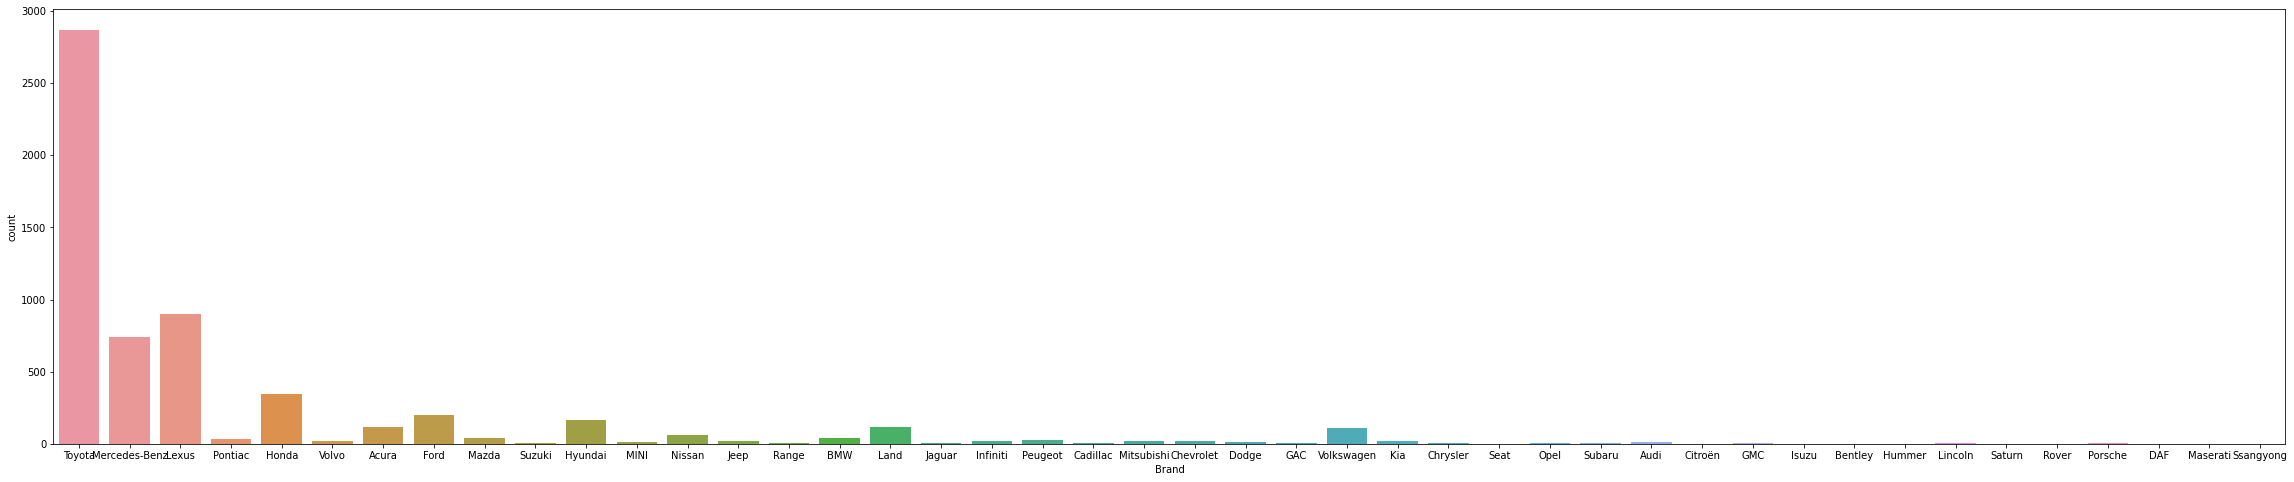

In [44]:
plt.figure(figsize=(40,8))
sns.countplot(data=cd_data, x='Brand')

In [105]:
pd.pivot_table(cd_data,index='Brand', values = 'Mileage_km', aggfunc='count')

,Mileage_km
Brand,
Acura,116
Audi,10
BMW,40
Bentley,1
Cadillac,3
Chevrolet,17
Chrysler,6
Citroën,1
DAF,1


From the table and figure above, toyota has the highest number of listings.

# Average price of cars per location



In [106]:
pd.pivot_table(cd_data,index='State', values = 'Prices', aggfunc='mean')

,Prices
State,
Abuja,9.561965e+06
Adamawa,1.001500e+07
Kaduna,7.331635e+06
Kano,2.715000e+06
Lagos,8.627459e+06
Lagos State,1.620800e+07
Ogun,3.915174e+06
Oyo,3.833036e+06
Port Harcourt,4.800774e+06


More detailed information on the distriution of car prices can be gotten by grouping the car prices and filtering.

In [108]:
Price_group=[]
for c in cd_data.Prices:
    if c<2000000:
        Price_group.append("0-1.99m")
    elif 1999999<c<5000000:
        Price_group.append("2m-4.99m")
    elif 4999999<c<10000000:
        Price_group.append("5m-9.99m")
    elif 9999999<c<20000000:
        Price_group.append("10m-19.99m")
    elif 19999999<c<50000000:
        Price_group.append("20m-40.99m")
    elif 40999999<c<100000000:
        Price_group.append("50m-99.99m")
    else:
        Price_group.append("100m-150m")
 
cd_data['Price_group']=Price_group

In [111]:
pd.pivot_table(cd_data,index='State',columns='Price_group', values = 'Mileage_km', aggfunc='count')

Price_group,0-1.99m,100m-150m,10m-19.99m,20m-40.99m,2m-4.99m,50m-99.99m,5m-9.99m
State,,,,,,,
Abuja,17.0,1.0,99.0,50.0,233.0,7.0,229.0
Adamawa,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Kaduna,2.0,NaN,15.0,4.0,34.0,NaN,30.0
Kano,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Lagos,106.0,9.0,727.0,302.0,2015.0,37.0,1498.0
Lagos State,NaN,NaN,NaN,1.0,NaN,NaN,1.0
Ogun,4.0,NaN,2.0,NaN,29.0,NaN,8.0
Oyo,7.0,NaN,1.0,NaN,37.0,NaN,11.0
Port Harcourt,45.0,NaN,22.0,2.0,249.0,1.0,120.0


# Car listings by model year

In [134]:
pd.pivot_table(cd_data,index='Car_name',columns='Years',values='Mileage_km',aggfunc='count')

Years,1970,1988,1989,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Car_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acura MDX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,6.0,5.0,5.0,8.0,19.0,8.0,4.0,5.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,NaN,1.0,NaN
Acura NSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acura RDX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Acura RL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acura TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volvo S60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volvo S80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Volvo V50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# car model with the highest rating



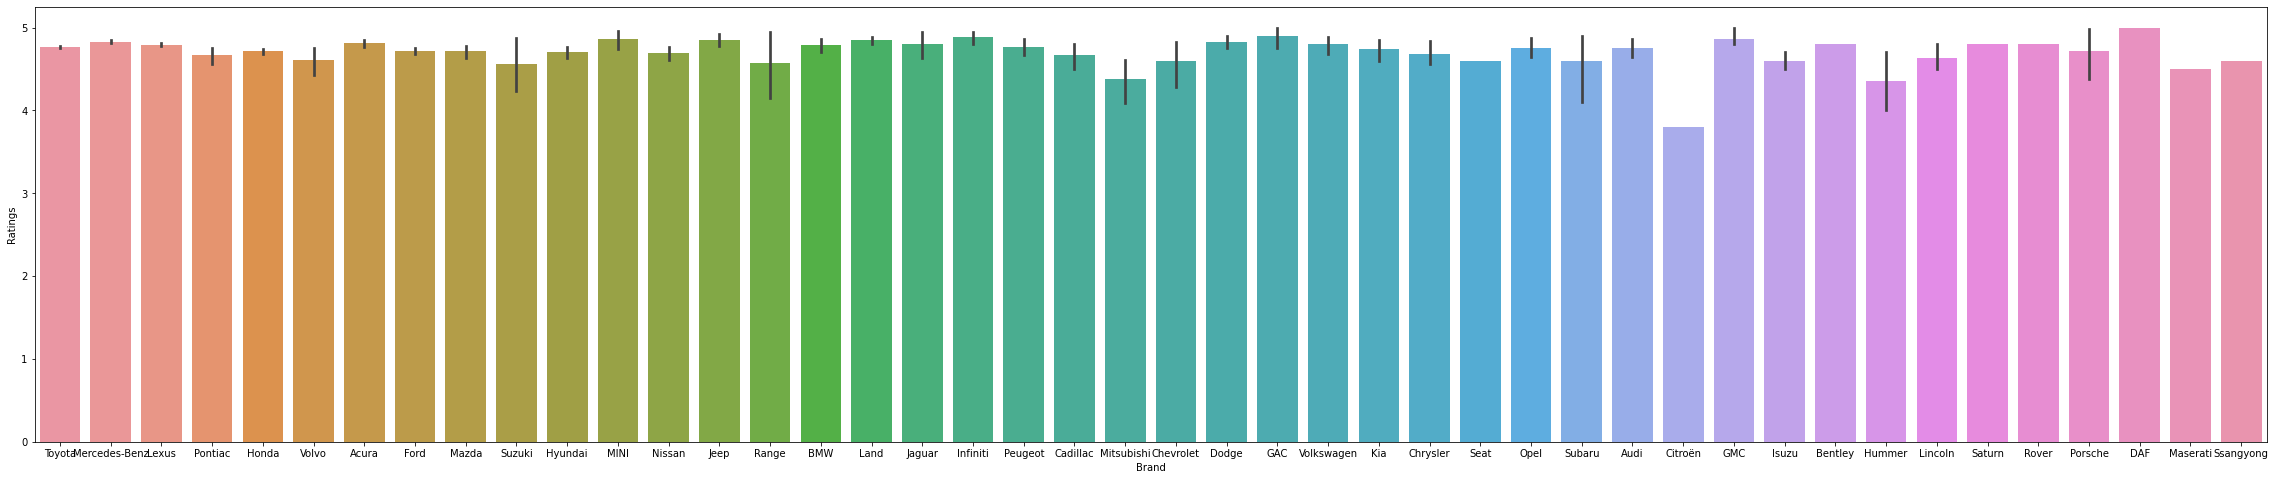

In [50]:
plt.figure(figsize=(40,8))
sns.barplot(data=cd_data, x='Brand', y='Ratings')

In [123]:
pd.pivot_table(cd_data,index='Brand',columns='Ratings', values = 'Mileage_km', aggfunc='count')

Ratings,0.0,1.6,2.5,2.7,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
Brand,,,,,,,,,,,,,,,,,,,,,,,,,
Acura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN,7.0,18.0,14.0,29.0,37.0
Audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,3.0,1.0,3.0,1.0
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,3.0,1.0,2.0,5.0,7.0,6.0,14.0
Bentley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Cadillac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN
Chevrolet,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,3.0,1.0,1.0,6.0
Chrysler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0
Citroën,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Toyota cars are the highest rated cars.

# Most frequent rating of the cars



In [127]:
pd.pivot_table(cd_data,index='Ratings',values='Mileage_km',aggfunc='count')

,Mileage_km
Ratings,
0.0,4
1.6,1
2.5,1
2.7,1
3.0,2
3.1,4
3.2,2
3.3,1
3.4,1


The rating with the highest frequency is 5.0

# Most frequent status of the cars



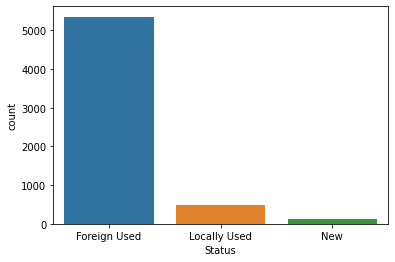

In [54]:
sns.countplot(data=cd_data, x='Status')

In [ ]:
Majority of the cars are foreign used.

# Average price based on the status of the cars



In [130]:
pd.pivot_table(cd_data,index='Status',columns='Brand',values='Prices',aggfunc='mean')

Brand,Acura,Audi,BMW,Bentley,Cadillac,Chevrolet,Chrysler,Citroën,DAF,Dodge,Ford,GAC,GMC,Honda,Hummer,Hyundai,Infiniti,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,Lincoln,MINI,Maserati,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Opel,Peugeot,Pontiac,Porsche,Range,Rover,Saturn,Seat,Ssangyong,Subaru,Suzuki,Toyota,Volkswagen,Volvo
Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Foreign Used,5.313063e+06,8045000.0,9.238031e+06,20015000.0,5565000.0,9.048667e+06,3078750.0,1915000.0,5215000.0,5.117308e+06,5.352302e+06,8315000.0,12715000.0,5320511.66,3815000.0,4.784670e+06,14274062.5,NaN,7005000.0,1.405469e+07,5.542222e+06,3.005497e+07,9.846072e+06,3.248333e+06,6.044167e+06,43015000.0,3.320000e+06,1.355258e+07,3.425000e+06,4.543740e+06,1853750.0,2620200.0,2.791032e+06,22340000.0,11915000.0,1615000.0,2115000.0,1840000.0,2915000.0,4847500.0,3055000.0,6.624402e+06,2.866667e+06,2860625.0
Locally Used,6.410000e+06,3315000.0,2.599500e+07,NaN,6710000.0,3.665000e+06,2390000.0,NaN,NaN,NaN,4.118250e+06,14515000.0,NaN,2808475.00,2915000.0,3.875714e+06,21615000.0,13265000.0,2745000.0,NaN,2.315000e+06,1.258833e+07,6.529167e+06,NaN,4.315000e+06,NaN,1.481667e+06,7.122500e+06,5.113889e+06,6.242778e+06,1015000.0,915000.0,NaN,17015000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.183027e+06,1.873571e+06,2890000.0
New,2.101500e+07,NaN,5.209833e+07,NaN,NaN,NaN,NaN,NaN,NaN,5.715000e+06,4.665000e+06,10215000.0,NaN,10115000.00,NaN,1.033917e+07,39765000.0,NaN,NaN,NaN,5.315000e+06,4.939000e+07,3.624786e+07,NaN,NaN,NaN,NaN,5.381500e+07,2.591500e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2865000.0,NaN,2.576103e+07,6.815000e+06,NaN


# Status of models

In [57]:

pd.pivot_table(cd_data,index='Status',columns='Brand', values = 'Mileage_km', aggfunc='count')

Brand,Acura,Audi,BMW,Bentley,Cadillac,Chevrolet,Chrysler,Citroën,DAF,Dodge,Ford,GAC,GMC,Honda,Hummer,Hyundai,Infiniti,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,Lincoln,MINI,Maserati,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Opel,Peugeot,Pontiac,Porsche,Range,Rover,Saturn,Seat,Ssangyong,Subaru,Suzuki,Toyota,Volkswagen,Volvo
Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Foreign Used,111.0,7.0,32.0,1.0,2.0,15.0,4.0,1.0,1.0,13.0,179.0,1.0,3.0,300.0,1.0,144.0,16.0,NaN,5.0,16.0,18.0,96.0,847.0,3.0,12.0,1.0,36.0,677.0,6.0,50.0,4.0,25.0,31.0,4.0,4.0,1.0,1.0,2.0,1.0,2.0,5.0,2566.0,96.0,16.0
Locally Used,4.0,3.0,5.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,20.0,2.0,NaN,40.0,1.0,14.0,2.0,2.0,1.0,NaN,2.0,15.0,39.0,NaN,1.0,NaN,3.0,60.0,9.0,9.0,1.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.0,7.0,2.0
New,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,2.0,NaN,6.0,2.0,NaN,NaN,NaN,1.0,2.0,14.0,NaN,NaN,NaN,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,68.0,4.0,NaN


There are very few cars whose status are new from each brand, with some brands not having new cars at all while all brands except Isuzu have foreign used as their status.